#Base de dados:

##Breast Cancer Wisconsin (Diagnostic)


### Dados relativos a diagnóstico de câncer de mama de Wisconsin.

### variáveis ​características dos núcleos celulares presentes na imagem (entradas) e diagnostico (saídas)

### Wolberg, W., Mangasarian, O., Street, N., & Street, W. (1993). Breast Cancer Wisconsin (Diagnostic) [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.

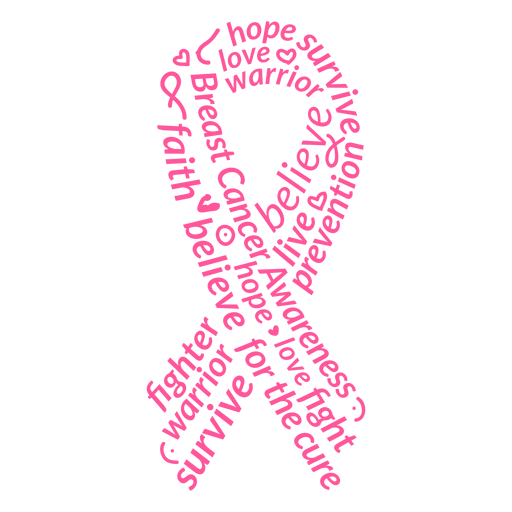

# Detalhes da base

### Número de identificação

### Diagnóstico (M = maligno, B = benigno)

### São calculadas dez caraterísticas de valor real para cada núcleo de célula:

    radius – raio médio dos núcleos
    
    texture – desvio padrão dos valores de intensidade cinza
    
    perimeter – perímetro
    
    area – área
    
    smoothness – variação local nos comprimentos de raio
    
    compactness – (perímetro² / área - 1.0)
    
    concavity – severidade das concavidades do contorno
    
    concave points – número de pontos côncavos
    
    symmetry – simetria
    
    fractal dimension – "rugosidade" das fronteiras

Para cada uma dessas 10 features, foram computadas 3 estatísticas:

    mean – média
    
    se – erro padrão
    
    worst – valor mais extremo observado

totalizando 10 × 3 = 30 colunas.

In [6]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pandas as pd

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# Combinar os dados em um único DataFrame
df = pd.concat([X, y], axis=1)

df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [8]:
df["Diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [9]:
df['Diagnosis'] = df['Diagnosis'].map({'B': 0, 'M': 1})

df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


# A

## Verificando se há outliers nas features

In [71]:
# Selecionar todas as colunas menos a última (assumindo que é 'Diagnosis')
features = df.columns[:-1]

# Função para contar outliers via IQR
def count_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((series < lower) | (series > upper)).sum()  #soma os valores tr de outliers


outliers = df[features].apply(count_outliers)

print(outliers)


# # Dividir o dataframe por classe
# df_benigno = df[df['Diagnosis'] == 0]
# df_maligno = df[df['Diagnosis'] == 1]
# # Aplicar a função em cada grupo
# outliers_benigno = df_benigno[features].apply(count_outliers)
# outliers_maligno = df_maligno[features].apply(count_outliers)
# # Criar um DataFrame com os dois resultados lado a lado
# df_outliers = pd.DataFrame({
#     'Outliers_Benigno': outliers_benigno,
#     'Outliers_Maligno': outliers_maligno
# })
# print(df_outliers)



radius1               14
texture1               7
perimeter1            13
area1                 25
smoothness1            6
compactness1          16
concavity1            18
concave_points1       10
symmetry1             15
fractal_dimension1    15
radius2               38
texture2              20
perimeter2            38
area2                 65
smoothness2           30
compactness2          28
concavity2            22
concave_points2       19
symmetry2             27
fractal_dimension2    28
radius3               17
texture3               5
perimeter3            15
area3                 35
smoothness3            7
compactness3          16
concavity3            12
concave_points3        0
symmetry3             23
fractal_dimension3    24
dtype: int64


## Boxplot das duas Features

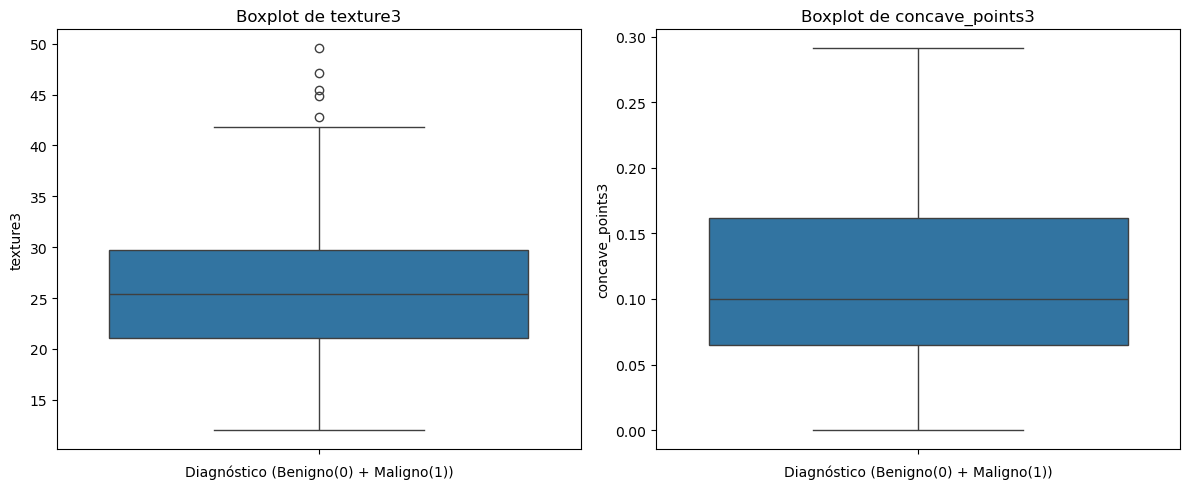

                       CV   Curtose  Skewness      Média  Moda
texture3         0.239366  0.211809  0.497007  25.677223  17.7
concave_points3  0.573549 -0.541367  0.491316   0.114606   0.0


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import kurtosis, skew, mode

def analisar_features_com_boxplot(df, features):
    # Criar a figura
    plt.figure(figsize=(12, 5))
    
    # Dicionário para guardar as estatísticas
    estatisticas = {}
    
    # Plotar um boxplot para cada feature
    for i, feature in enumerate(features):
        plt.subplot(1, 2, i + 1)
        sns.boxplot(y=feature, data=df)
        plt.title(f'Boxplot de {feature}')
        plt.xlabel('Diagnóstico (Benigno(0) + Maligno(1))')
        plt.ylabel(feature)
    
        # Calcular estatísticas
        df_feature = df[feature].dropna()
        media = df_feature.mean()
        desvio = df_feature.std()
        cv = desvio / media if media != 0 else float('nan')
        curtose = kurtosis(df_feature)
        assimetria = skew(df_feature)
        moda = mode(df_feature, keepdims=False).mode  # evita erro de forma
    
        estatisticas[feature] = {
            'CV': cv,
            'Curtose': curtose,
            'Skewness': assimetria,
            'Média': media,
            'Moda': moda
        }
    
    plt.tight_layout()
    plt.show()
    
    # Exibir as estatísticas
    return pd.DataFrame(estatisticas).T


features = ['texture3', 'concave_points3']
estatisticas_df = analisar_features_com_boxplot(df, features)
print(estatisticas_df)



## Introduzindo Outliers na feature

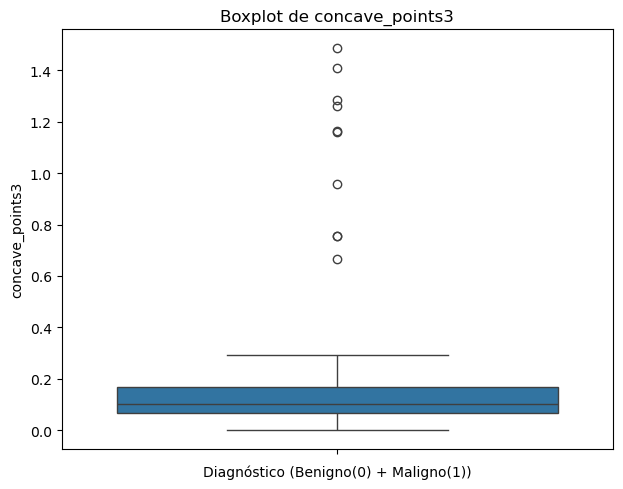

                       CV   Curtose  Skewness    Média  Moda
concave_points3  1.121351  43.08377  5.886274  0.13145   0.0


In [65]:
import numpy as np
import pandas as pd

# Cópia do DataFrame original
df_outlier = df.copy()

# Calcular limites para definir outliers
q1 = df['concave_points3'].quantile(0.25)
q3 = df['concave_points3'].quantile(0.75)
iqr = q3 - q1
limite_superior = q3 + 1.5 * iqr

# Gerar 10 valores outliers (exageradamente altos)
np.random.seed(42)
outlier_vals = np.random.uniform(limite_superior * 2, limite_superior * 5, size=10)

# Criar 10 novas linhas com outliers apenas em 'concave_points3'
# Outras colunas podem ser preenchidas com NaN ou valores neutros
novas_linhas = pd.DataFrame({
    col: [np.nan]*10 for col in df.columns
})
novas_linhas['concave_points3'] = outlier_vals
novas_linhas['Diagnosis'] = -1  # valor fictício para distinguir essas linhas, se quiser

# Adicionar ao DataFrame original
df_outlier = pd.concat([df_outlier, novas_linhas], ignore_index=True)

features = ['concave_points3']
estatisticas_df = analisar_features_com_boxplot(df_outlier, features)
print(estatisticas_df)

# B